# Interactive notebooks

`ipywidgets` provides the Python bindings for interactive elements in Jupyter notebooks.  Bindings for other language to use with non-Python kernels are available as well.

In [23]:
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings

## Fast compute

Define a function that will plot $\tanh(\beta x)$ for $x \in [-5, 5]$ and $\beta > 0$ a parameter value.

In [7]:
def plot_tanh(beta):
    x = np.linspace(-5.0, 5.0, 101)
    y = np.tanh(beta*x)
    _ = plt.plot(x, y)

Now this function can be run for various values of `beta`, e.g.,

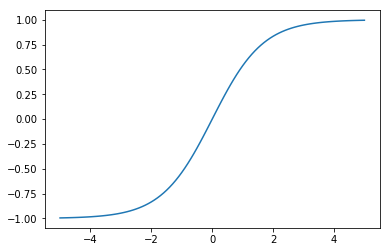

In [11]:
plot_tanh(0.6)

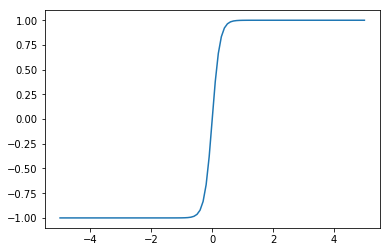

In [9]:
plot_tanh(4.0)

However, it would be much more interesting if the value of `beta` could be modified interactively, the plot modified on the fly.  A simple function decorated with accomplish this easily.

In [12]:
@interact(beta=(0.2, 5.0, 0.2))
def plot_tanh(beta):
    x = np.linspace(-5.0, 5.0, 101)
    y = np.tanh(beta*x)
    _ = plt.plot(x, y)

interactive(children=(FloatSlider(value=2.4000000000000004, description='beta', max=5.0, min=0.2, step=0.2), O…

A plot can be parameterized by multiple values, either numerical or categorical.

## Slow compute

Define a function that computes the number of iterations of $z = z^2 + c$ such that $|z| < 2$ in the complex plane.

In [26]:
def compute_fractal(c_re, c_im):
    c = complex(c_re, c_im)
    max_iters = 255
    nr_points = 300
    max_val = 1.8
    max_norm = 2.0
    x = np.linspace(-max_val, max_val, nr_points)
    y = np.linspace(-max_val, max_val, nr_points)
    X, Y = np.meshgrid(x, y)
    Z = X + Y*1j
    iterations = np.zeros(Z.shape, dtype=np.uint8)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        for _ in range(max_iters):
            Z = Z**2 + c
            iterations[np.abs(Z) < max_norm] += 1
    return iterations
        

Define a function to plot the result of that function as a heatmap.

In [49]:
def plot_fractal(c_re, c_im):
    ns = compute_fractal(c_re, c_im)
    _, axes = plt.subplots()
    axes.imshow(ns)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)

You can call this function for various values of the real and imaginary part of $c$.

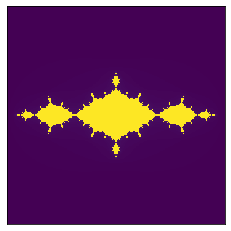

In [50]:
plot_fractal(-0.622772, 0.52193j)

However, the function takes a while to evaluate.

In [52]:
%timeit compute_fractal(-0.6, 0.4)

643 ms ± 73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


On average, it takes more than half a second to complete the computation, so making this interactive and just touching the sliders would result in jaggy output (at least).  Hence `interact_manual` is more appropriate, since the computation is only initiated when the `Run interact` button is pressed.

In [51]:
_ = interact_manual(plot_fractal, c_re=(-1.0, 1.0, 0.01), c_im=(-1.0, 1.0, 0.01))

interactive(children=(FloatSlider(value=0.0, description='c_re', max=1.0, min=-1.0, step=0.01), FloatSlider(va…